In [1]:
invisible(suppressMessages(suppressWarnings(c(library(plyr),
                                                library(Matrix),
                                                library(parallel),
                                                library(pbmcapply),
                                                library(patchwork),
                                                library(Seurat),
                                                library(tidyverse),
                                                library(future),
                                                source('~/data/preprocessing.R'),
                                                library(MetBrewer),
                                                library(svglite),
                                                library(SeuratDisk)
                                              ))))

In [2]:
base='/home/tbou/data/Bradl/raw'

In [3]:
samples=grep(x = list.dirs(base,recursive = F), pattern = 'GSM', value=T)

In [5]:
list_Seurat<-list()         
list_names_S<-list() 

for (f in samples){    
    
    sample= gsub(pattern = paste0(base, '/'), replacement = '',x = f)
    
    print(sample)
               
          barcode.path <- paste0(f,'/',sample,'_barcodes.tsv.gz')
          features.path <- paste0(f,'/',sample,'_features.tsv.gz')
          matrix.path <- paste0(f,'/',sample,'_matrix.mtx.gz')
          mat<-readMM(file = matrix.path)
        
          feature.names = read.delim(features.path, 
                             header = FALSE,
                             stringsAsFactors = FALSE)
          barcode.names = read.delim(barcode.path, 
                             header = FALSE,
                             stringsAsFactors = FALSE)
  
          barcode.names$V1=paste0(sample,':',sub(pattern = '-1$','x',barcode.names$V1))
                  
          colnames(mat) = barcode.names$V1
          rownames(mat) = feature.names$V2
        
          ####Seuratization
          seurat<-CreateSeuratObject(counts = mat,project = sample,min.cells = 0,min.features = 200,verbose=F)
  
          ###############doubletization
          #seurat<-doublets_col(seurat)
            
          ###Cleaning
        
          seurat[["percent_mito"]] <- PercentageFeatureSet(seurat, pattern = "^Mt-")
          seurat<-subset(seurat, subset = percent_mito < 5 )
          seurat<-subset(seurat, subset = nCount_RNA < 10000 )
          seurat<-subset(seurat, subset = nFeature_RNA < 4000 &  nFeature_RNA > 550)
          
          seurat<-doublets_col(sample = seurat)
          
  
          seurat@meta.data$sample=rep(x= sample, each=length(colnames(seurat@assays$RNA@counts)))
                 
  
          list_Seurat[length(list_Seurat)+1]<-seurat
          list_names_S[length(list_names_S)+1]<-sample
    
    print(sample)
    print(length(colnames(seurat@assays$RNA@counts)))
  
          rm(mat,seurat,barcode.names,feature.names,barcode.path,
             features.path,matrix.path,sample)
        
}

[1] "GSM5121163_Control_1"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c42c4ead9e\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c42c4ead9e.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c42c4ead9e.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121163_Control_1"
[1] 7337
[1] "GSM5121164_Control_2"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c45430f806\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c45430f806.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c45430f806.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121164_Control_2"
[1] 5915
[1] "GSM5121165_Control_3"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c44869aa9c\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c44869aa9c.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c44869aa9c.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121165_Control_3"
[1] 8737
[1] "GSM5121166_Control_4"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c41c08bce5\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c41c08bce5.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c41c08bce5.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121166_Control_4"
[1] 6236
[1] "GSM5121226_GDF15_1"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c41cf623b7\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c41cf623b7.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c41cf623b7.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121226_GDF15_1"
[1] 4724
[1] "GSM5121227_GDF15_2"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c42a0600ab\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c42a0600ab.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c42a0600ab.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121227_GDF15_2"
[1] 6252
[1] "GSM5121228_GDF15_3"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c4b912ae4\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c4b912ae4.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c4b912ae4.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121228_GDF15_3"
[1] 7052
[1] "GSM5121229_GDF15_4"


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "/home/tbou/miniconda3/envs/RNAvelo/bin/python3.8 -c 'import sys; import pandas; import scrublet; df = pandas.read_csv(\"/tmp/RtmpeLPy32/file1407c44a6f55fc\"); scrub = scrublet.Scrublet(df); doublet_scores, predicted_doublets = scrub.scrub_doublets(); pandas.DataFrame(doublet_scores).to_csv(\"/tmp/RtmpeLPy32/file1407c44a6f55fc.doubletScores\"); pandas.DataFrame(predicted_doublets).to_csv(\"/tmp/RtmpeLPy32/file1407c44a6f55fc.predicted_doublets\");'"


Warning message in `[<-`(`*tmp*`, length(list_Seurat) + 1, value = seurat):
“implicit list embedding of S4 objects is deprecated”


[1] "GSM5121229_GDF15_4"
[1] 9947


In [6]:
merged=merge(x = list_Seurat[[1]],y=list_Seurat[2:length(list_Seurat)])

In [7]:
merged=subset(merged, subset= predicted_doublet == FALSE)

In [8]:
#remove cell cycle from genes considered in highly variable
cycle=read_csv('~/data/cell_cycle_genes/all_mouse_genes.csv')$all_genes_mouse

genes=rownames(merged)[!rownames(merged) %in% cycle]

Rows: 89 Columns: 1
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): all_genes_mouse

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
mito=grep(x = rownames(merged), pattern = '^Mt-', value = T)
genes=genes[!genes %in% mito]

In [13]:
merged=NormalizeData(object = merged,scale.factor = 10000)
merged <- ScaleData(merged, verbose = FALSE)


merged= FindVariableFeatures(merged,selection.method = 'mean.var.plot',verbose = F)
merged <- RunPCA(merged,features = genes, npcs = 50, verbose = FALSE)


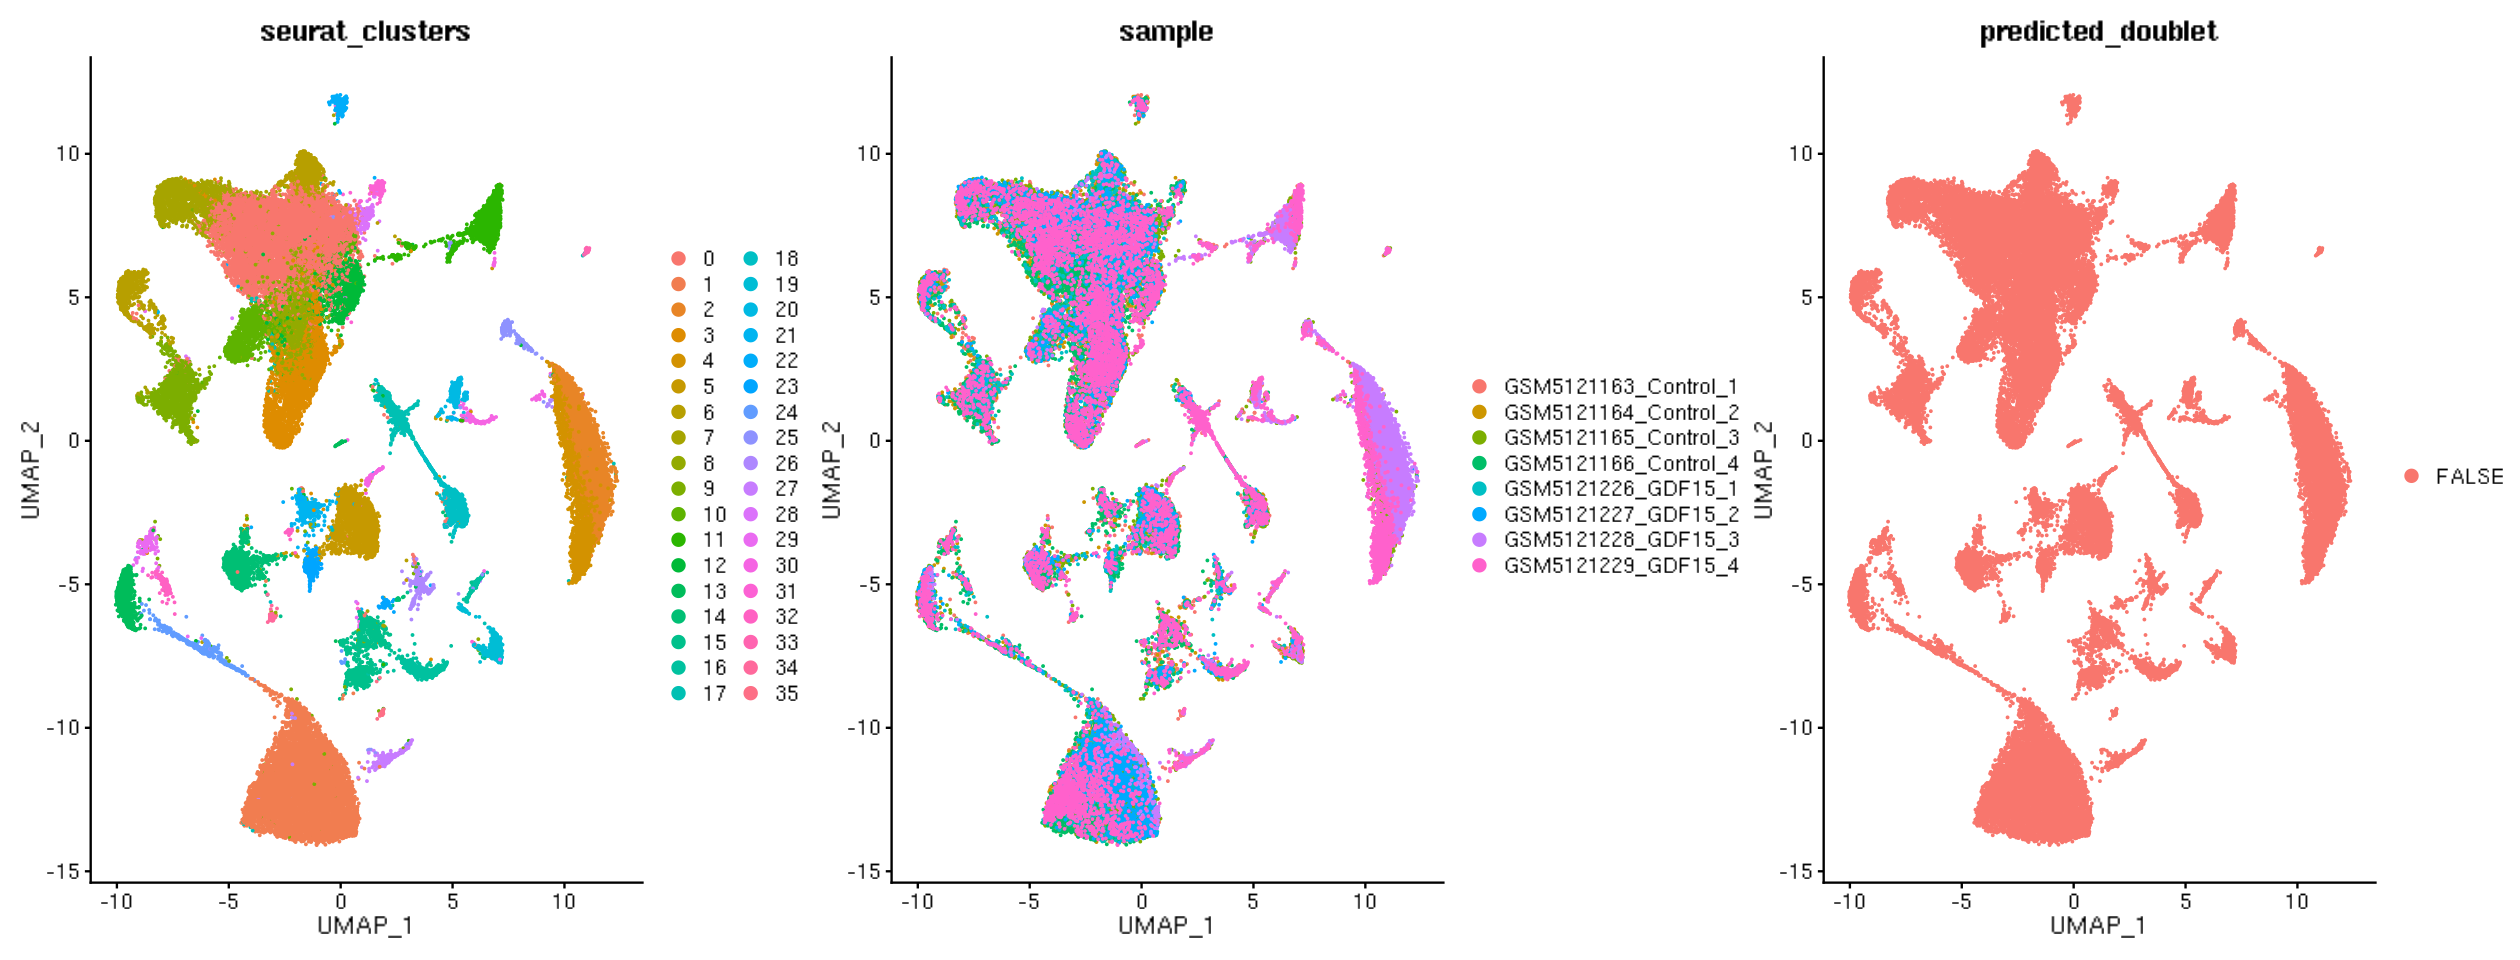

In [14]:
merged <- RunUMAP(merged, reduction = "pca",n.neighbors = 30, dims = 1:20, verbose = FALSE)
merged <- FindNeighbors(merged, reduction = "pca", dims = 1:30, verbose = FALSE)
merged <- FindClusters(merged, resolution = 0.5, verbose = FALSE)

options(repr.plot.width=21, repr.plot.height=8)
DimPlot(merged, group.by = c('seurat_clusters', 'sample', 'predicted_doublet'))

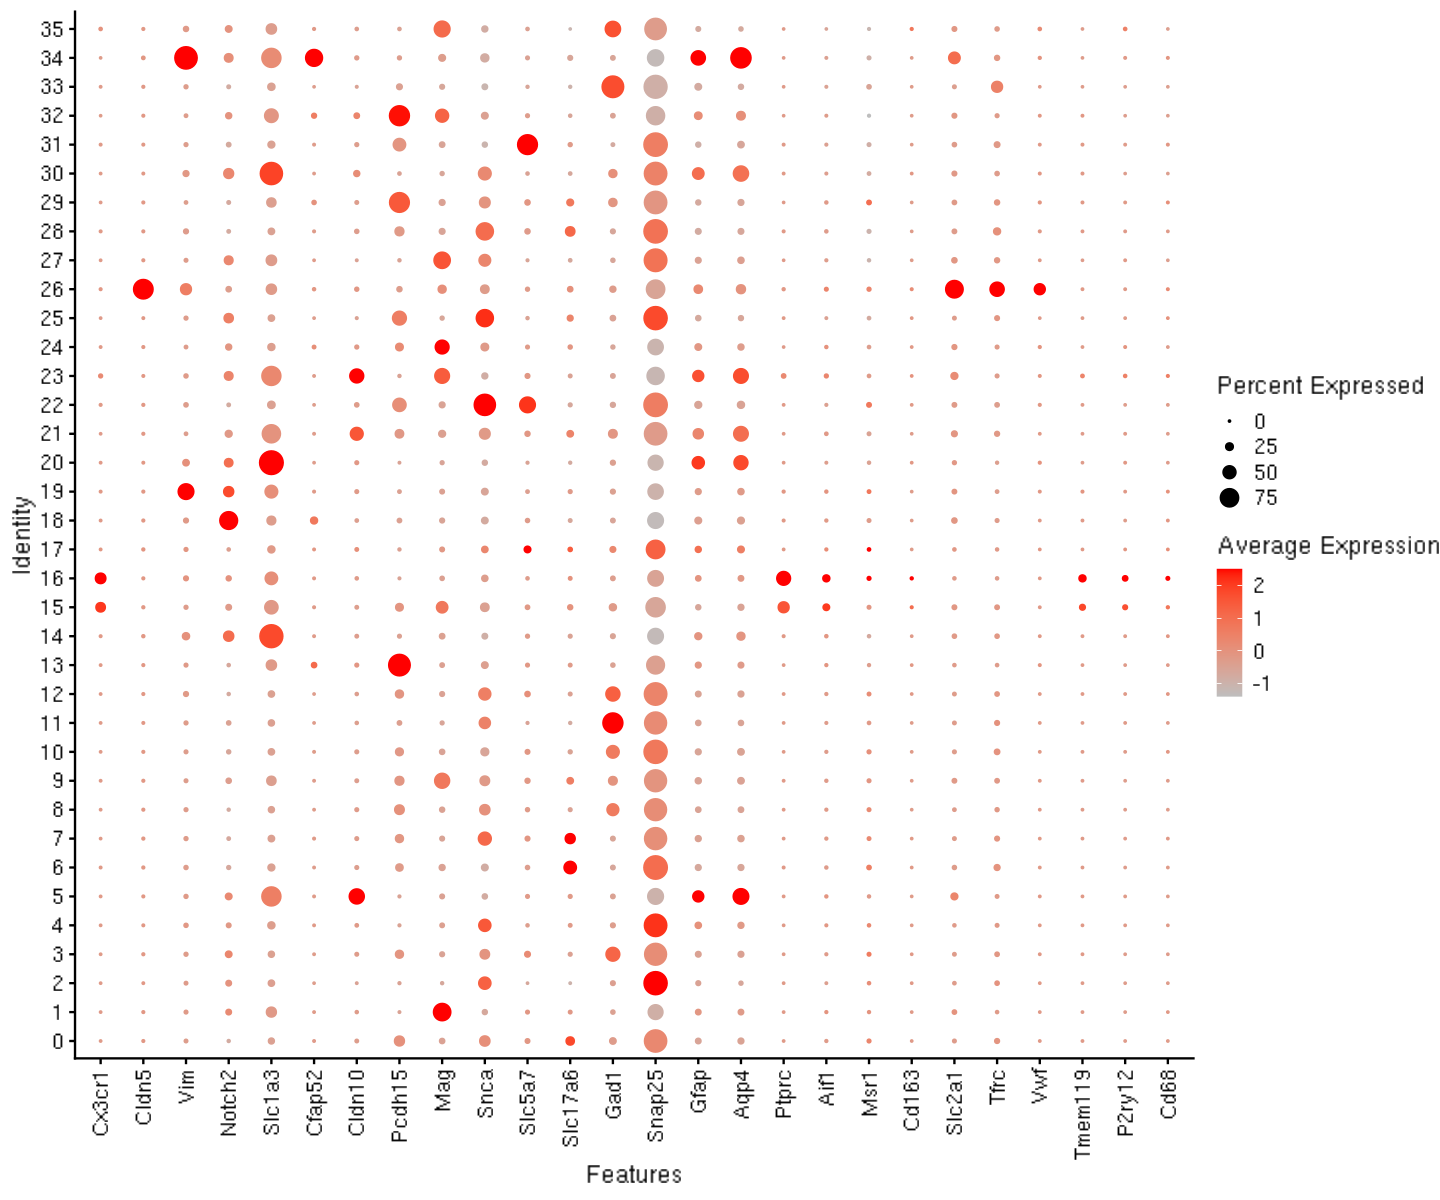

In [18]:
options(repr.plot.width=12, repr.plot.height=10
       )
DotPlot(merged, features = c('Cx3cr1','Cldn5','Vim','Notch2','Slc1a3','Cfap52','Cldn10', 'Pcdh15','Mag','Snca','Slc5a7','Slc17a6','Gad1','Snap25', 
                                 'Gfap', 'Aqp4','Ptprc', 'Aif1','Msr1','Cd163', 'Slc2a1','Tfrc','Vwf','Tmem119','P2ry12','Cd68'), cols = c('grey','red')) &
       theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

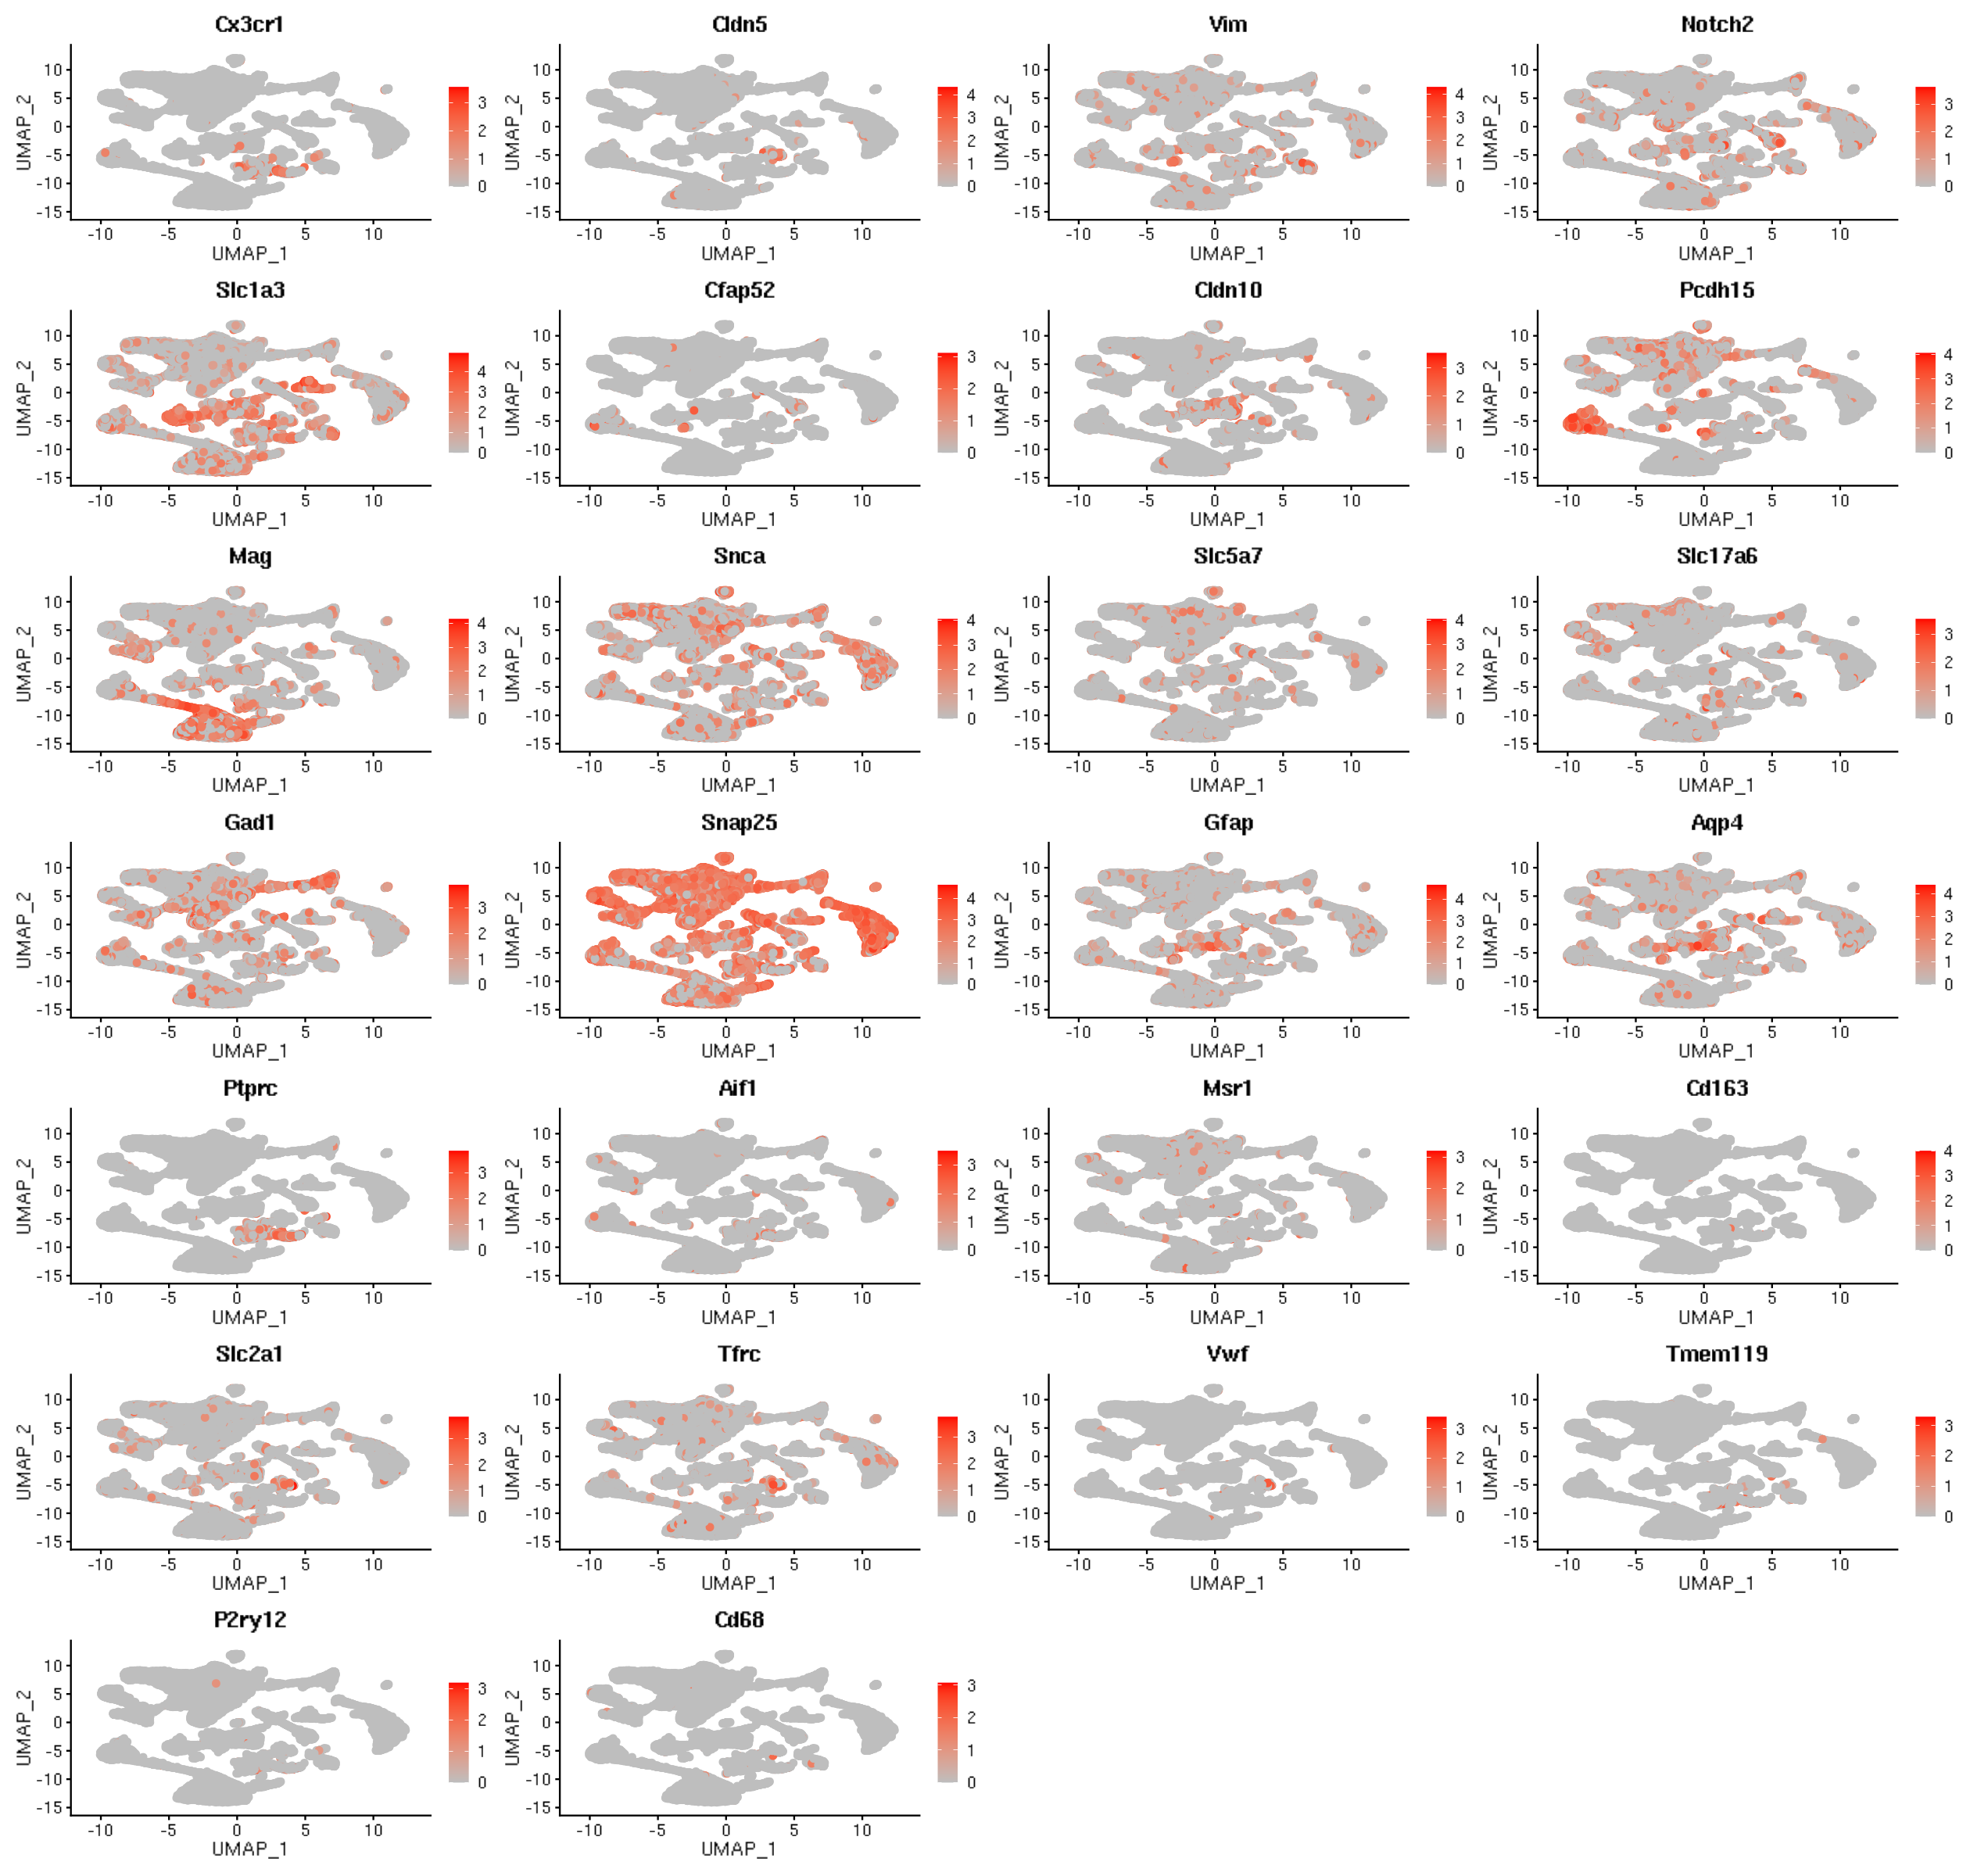

In [22]:
options(repr.plot.width=21, repr.plot.height=20)
FeaturePlot(merged, pt.size = 2,features = c('Cx3cr1','Cldn5','Vim','Notch2','Slc1a3','Cfap52','Cldn10', 'Pcdh15','Mag','Snca','Slc5a7','Slc17a6','Gad1','Snap25', 
                                 'Gfap', 'Aqp4','Ptprc', 'Aif1','Msr1','Cd163', 'Slc2a1','Tfrc','Vwf','Tmem119','P2ry12','Cd68'), cols = c('grey','red'), order=F
           )

In [36]:
# Annotating of the data
merged$cell_types<-merged$seurat_clusters%>%str_replace_all(c(
                                                    '^0$'='ex_neuro_2',
                                                    '^1$'='Oligodendrocytes',
                                                    '^2$'='Cholinergic_neurons',
                                                     '^3$'='interneurons_5',
                                                    '^4$'='Cholinergic_neurons',
                                                     '^5$'='Astro_1',
                                                     '^6$'='ex_neuro_2',
                                                     '^7$'='ex_neuro_1',
                                                     '^8$'='interneurons_4',
                                                     '^9$'='interneurons_2',
                                                     '10'='interneurons_6',
                                                     '11'='interneurons_1',
                                                     '12'='interneurons_3',
                                                     '13'='OPCs',
                                                     '14'='Radial_glia_3',
                                                     '15'='microglia',
                                                     '16'='microglia',
                                                     '17'='Radial_glia_1',
                                                     '18'='Radial_glia_2',
                                                     '19'='Tanycytes',
                                                     '20'='Unknown_3',
                                                     '21'='Astro_2',
                                                     '22'='ord_neurons',
                                                     '23'='Astro_3',
                                                     '24'='Differentiating_oligodendrocytes',
                                                     '25'='Cholinergic_neurons',
                                                     '26'='Endothelial cells',
                                                     '27'='Oligodendrocytes_2',
                                                     '28'='unknown_neuron_2',
                                                     '29'='Oligodendrocytes_2',
                                                     '30'='Unknown_2',
                                                     '31'='unknown_neuron_1',
                                                     '32'='Oligodendrocytes_2',
                                                     '33'='Unknown_1',
                                                     '34'='Ependymocytes',
                                                     '35'='Unknown_3'))


#order the cell types
merged$cell_types <- factor(x = merged$cell_types , levels = rev(c('OPCs','Differentiating_oligodendrocytes','Oligodendrocytes','Oligodendrocytes_2',
    'Radial_glia_1','Radial_glia_2','Radial_glia_3',
    'Astro_1','Astro_2','Astro_3',  
'Tanycytes',
'Ependymocytes',
    'Endothelial cells','microglia',
'interneurons_1','interneurons_2','interneurons_3','interneurons_4','interneurons_5','interneurons_6',
'ex_neuro_1','ex_neuro_2',
'ord_neurons',
'Cholinergic_neurons',
'unknown_neuron_1','unknown_neuron_2',
'Unknown_1','Unknown_2','Unknown_3')))


png 
  2

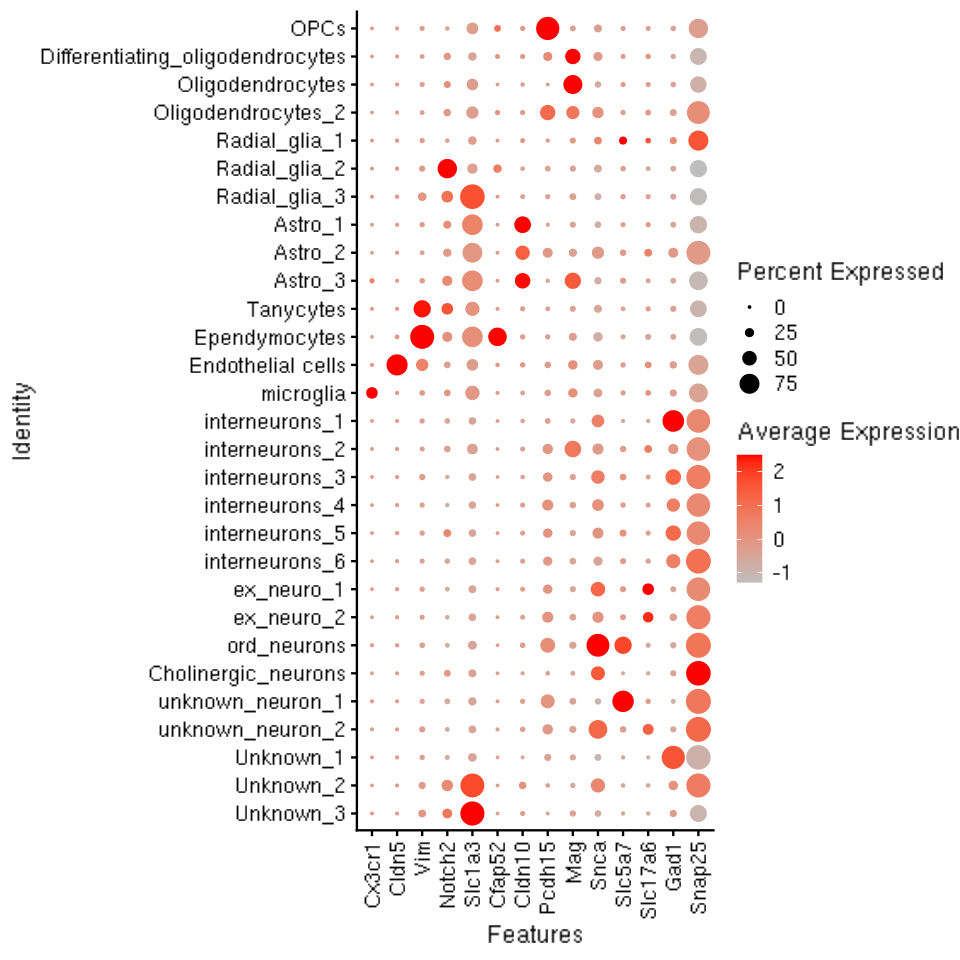

In [38]:
options(repr.plot.width=8, repr.plot.height=8)

p=DotPlot(merged,group.by = 'cell_types', features = c('Cx3cr1','Cldn5','Vim','Notch2','Slc1a3','Cfap52','Cldn10', 'Pcdh15','Mag','Snca','Slc5a7','Slc17a6','Gad1','Snap25'),
          cols = c('grey','red')) &
       theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

svglite(filename = paste0('~/data/Bradl/exports/embeddings/211123_DotPlot_chosen_genes_cell-types.svg'),width = 5,height = 4,fix_text_size = T,
    standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    
    plot(p)
   dev.off()
p

In [24]:
SaveH5Seurat(merged, filename = "~/data/Bradl/datasets/Control_GDF15_merged_Dataset.h5Seurat")
Convert("~/data/Bradl/datasets/Control_GDF15_merged_Dataset.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for pca

Adding feature loadings for pca

Adding dimensional reduction information for umap

Adding RNA_snn as neighbors



In [3]:
merged=LoadH5Seurat('~/data/Bradl/datasets/Control_GDF15_merged_Dataset.h5Seurat')

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding variable feature information for RNA

Adding miscellaneous information for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding graph RNA_nn

Adding graph RNA_snn

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



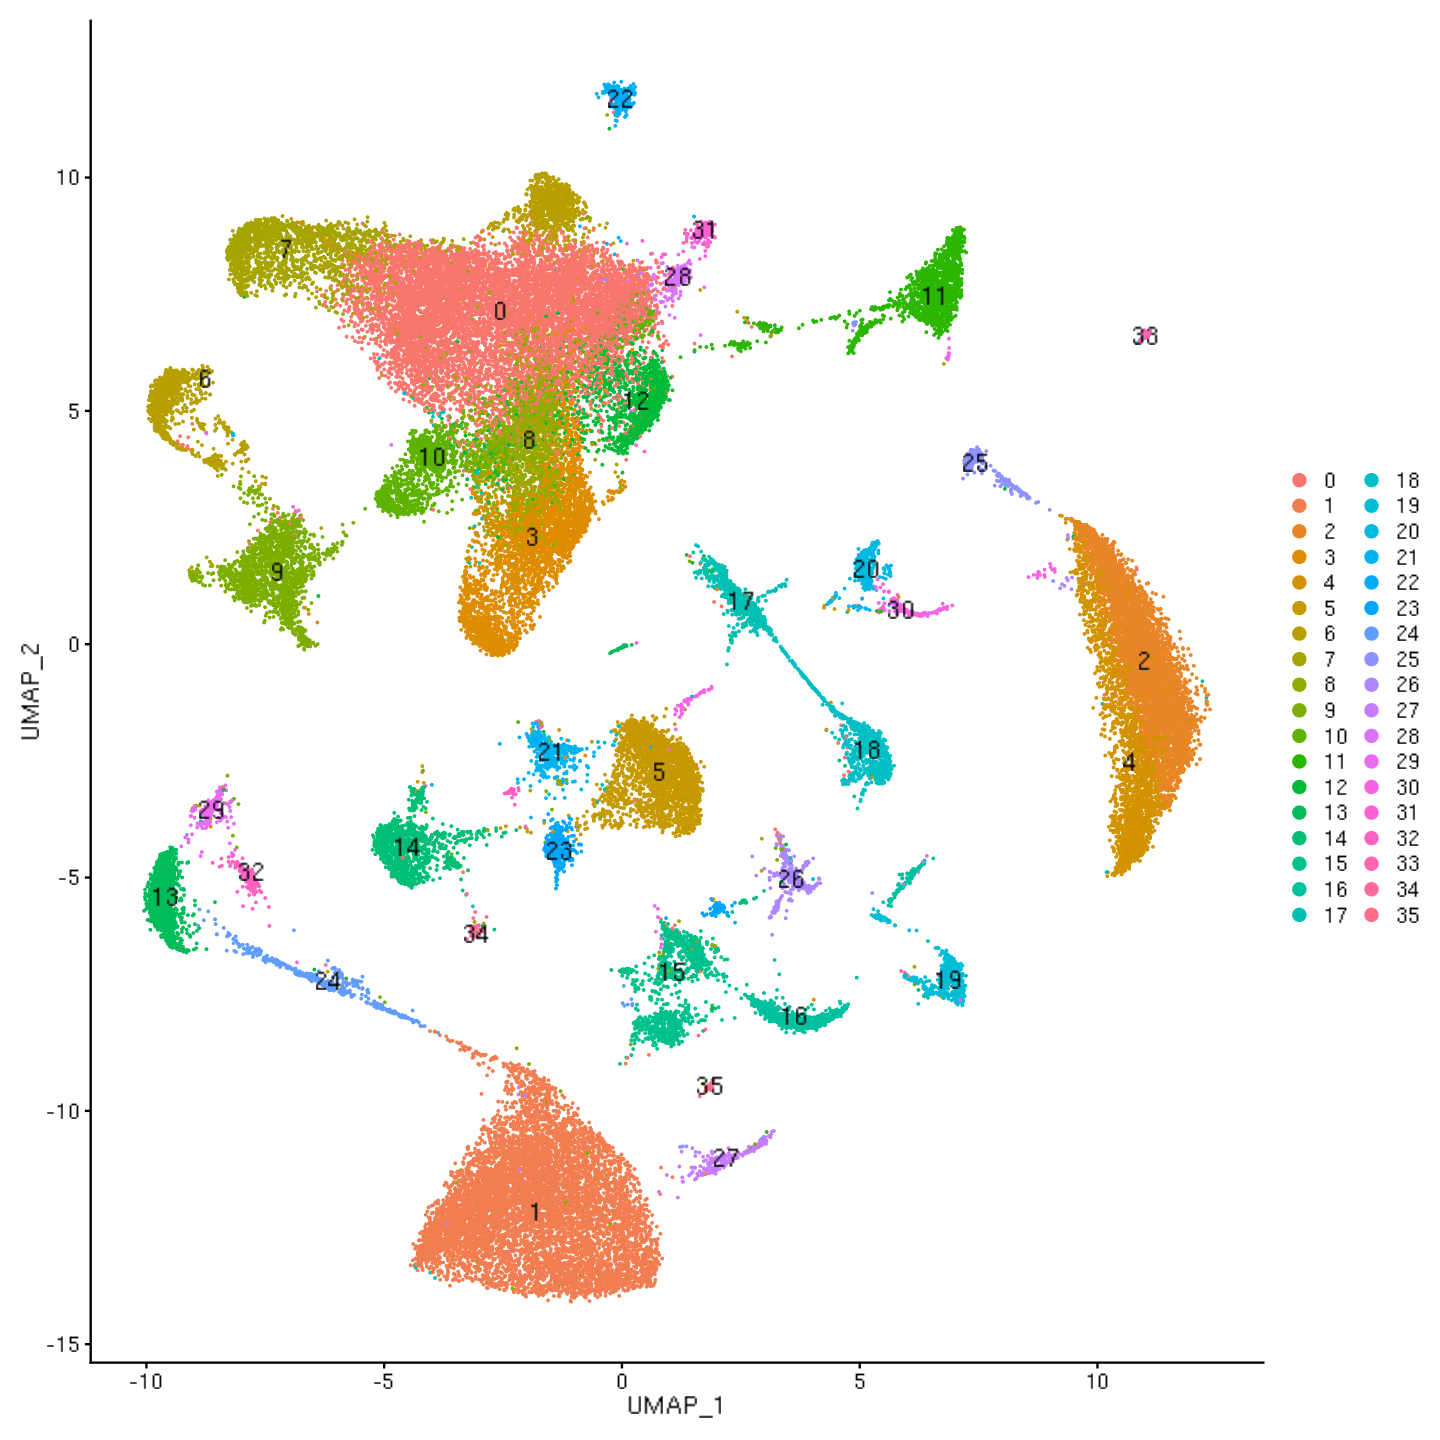

In [5]:
options(repr.plot.width=12, repr.plot.height=12)
DimPlot(merged, label = T,label.size = 5)

png 
  2

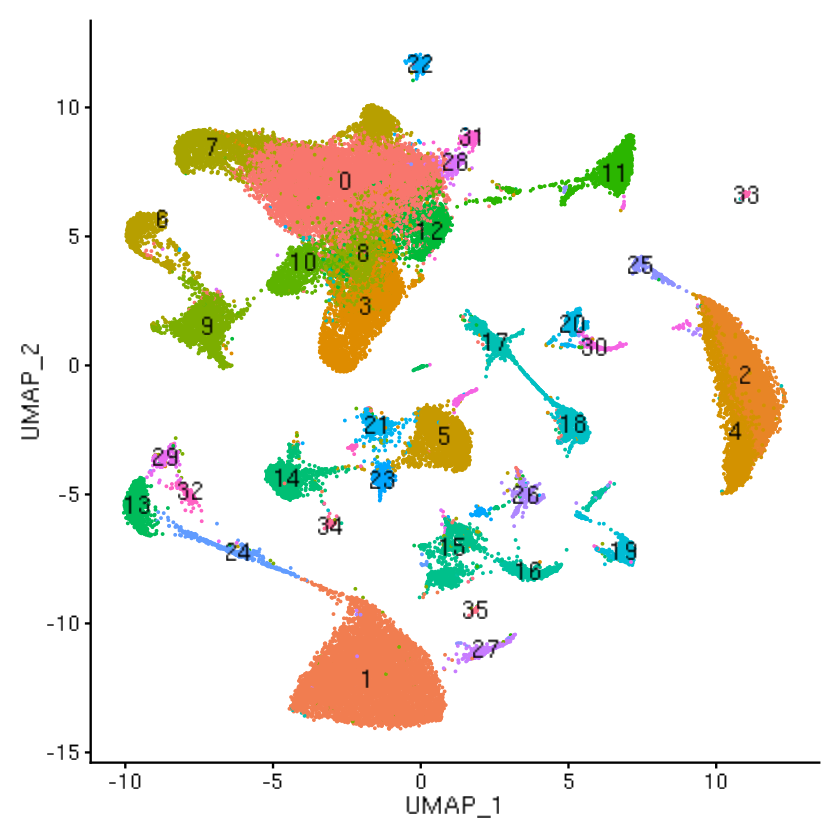

In [12]:
options(repr.plot.width=7, repr.plot.height=7)
p=DimPlot(merged, label = T,label.size = 5)&NoLegend()

svglite(filename = paste0('~/data/Bradl/exports/embeddings/211123_Embedding_CLUSTERS_ALL_DATASETS.svg'),width = 4,height = 4,fix_text_size = T,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    
    plot(p)
   dev.off()
p

png 
  2

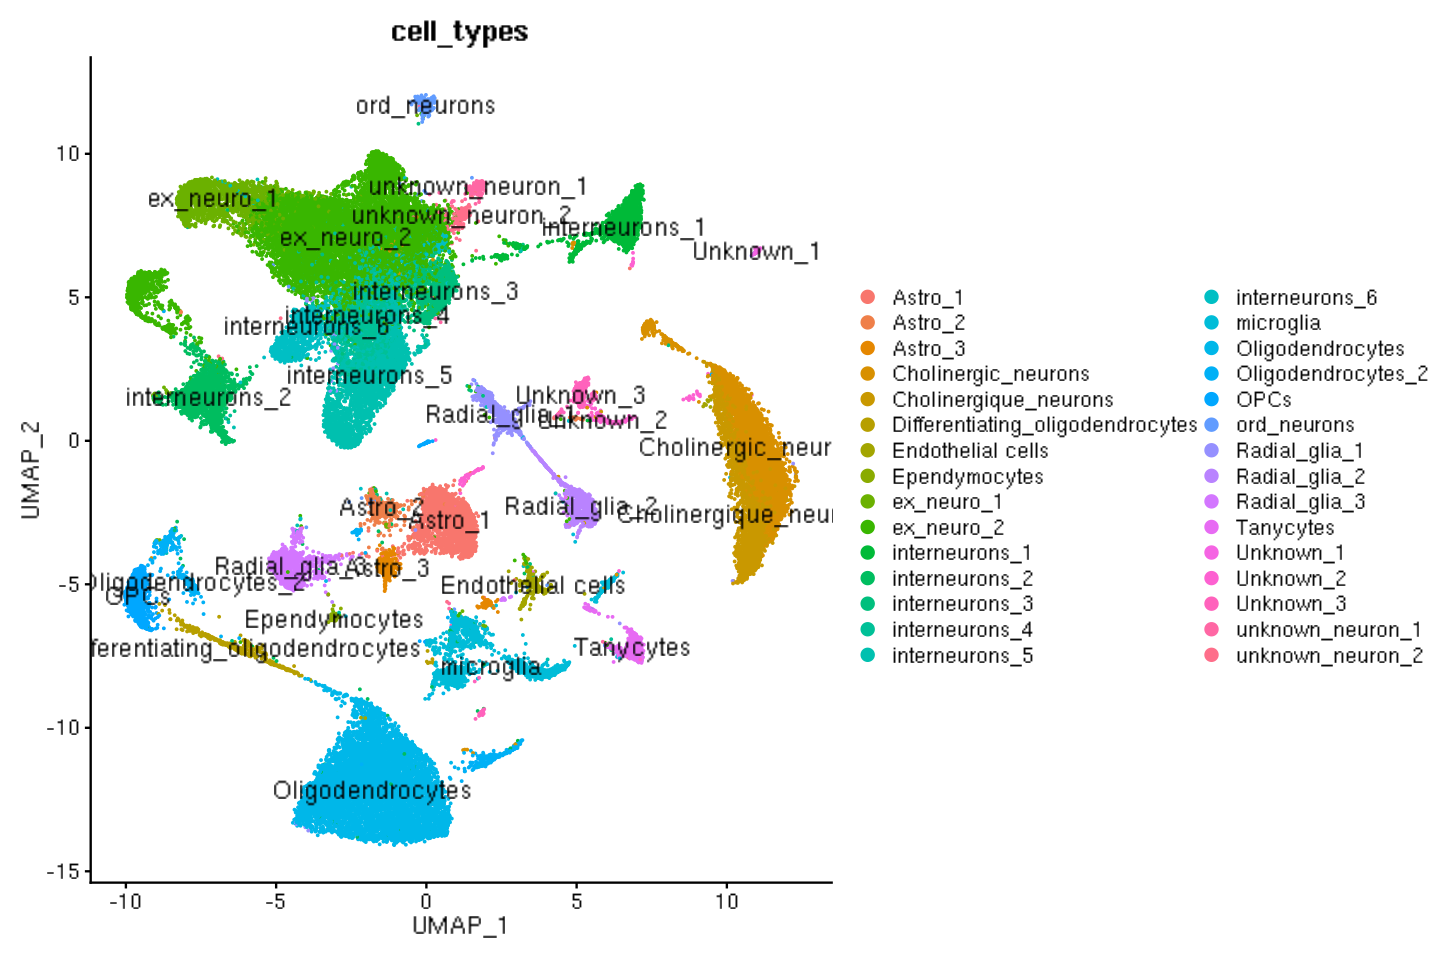

In [17]:
options(repr.plot.width=12, repr.plot.height=8)
p=DimPlot(merged, label = T,label.size = 5, group.by = 'cell_types')

svglite(filename = paste0('~/data/Bradl/exports/embeddings/211123_Embedding_CEll-types_ALL_DATASETS.svg'),width = 6.5,height = 4,fix_text_size = T,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    
    plot(p)
   dev.off()
p

In [13]:
write_rds(merged,'~/data/Bradl/datasets/Control_GDF15_merged_annotated_Dataset.RDS')

In [21]:
SaveH5Seurat(merged, filename = "~/data/Bradl/datasets/Control_GDF15_merged_annotated_Dataset.h5Seurat")
Convert("~/data/Bradl/datasets/Control_GDF15_merged_annotated_Dataset.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for pca

Adding feature loadings for pca

Adding dimensional reduction information for umap

Adding RNA_snn as neighbors

